# **Activity Detection**

Part 1

Data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

Our data consists of 12 folders, where each folder represents one activity. In each folder (except one), there are 12 CSV files with data. Each CSV file corresponds to one sensor that recorded the data. A description of the files with their values is provided below.

**Acceleration (Accelerometer)**
- Accelerometer_z: Acceleration along the Z-axis.
- Accelerometer_y: Acceleration along the Y-axis.
- Accelerometer_x: Acceleration along the X-axis.

**Annotation** - empty  


**Gravity**
- Gravity_z: Gravity vector component along the Z-axis.
- Gravity_y: Gravity vector component along the Y-axis.
- Gravity_x: Gravity vector component along the X-axis.

**Gyroscope**
- Gyroscope_z: Angular velocity around the Z-axis.
- Gyroscope_y: Angular velocity around the Y-axis.
- Gyroscope_x: Angular velocity around the X-axis.

**Location**
- Location_bearingAccuracy: Bearing (azimuth) accuracy in location.
- Location_speedAccuracy: Speed accuracy in location.
- Location_verticalAccuracy: Altitude accuracy in location.
- Location_horizontalAccuracy: Horizontal accuracy in location.
- Location_speed: Speed in location.
- Location_bearing: Bearing (azimuth) in location.
- Location_altitude: Altitude in location.
- Location_longitude: Longitude in location.
- Location_latitude: Latitude in location.

**Metadata** - additional data

**GPS (LocationGps)**
- LocationGps_bearingAccuracy: Bearing (azimuth) accuracy obtained from GPS.
- LocationGps_speedAccuracy: Speed accuracy obtained from GPS.
- LocationGps_verticalAccuracy: Altitude accuracy obtained from GPS.
- LocationGps_horizontalAccuracy: Horizontal accuracy obtained from GPS.
- LocationGps_speed: Speed obtained from GPS.
- LocationGps_bearing: Bearing (azimuth) obtained from GPS.
- LocationGps_altitude: Altitude obtained from GPS.
- LocationGps_longitude: Longitude obtained from GPS.
- LocationGps_latitude: Latitude obtained from GPS.

**Network Location (LocationNetwork)**
- LocationNetwork_bearingAccuracy: Bearing (azimuth) accuracy obtained from the network.
- LocationNetwork_speedAccuracy: Speed accuracy obtained from the network.
- LocationNetwork_verticalAccuracy: Altitude accuracy obtained from the network.
- LocationNetwork_horizontalAccuracy: Horizontal accuracy obtained from the network.
- LocationNetwork_speed: Speed obtained from the network.
- LocationNetwork_bearing: Bearing (azimuth) obtained from the network.
- LocationNetwork_altitude: Altitude obtained from the network.
- LocationNetwork_longitude: Longitude obtained from the network.
- LocationNetwork_latitude: Latitude obtained from the network.

**Magnetometer**
- Magnetometer_z: Magnetic field strength along the Z-axis.
- Magnetometer_y: Magnetic field strength along the Y-axis.
- Magnetometer_x: Magnetic field strength along the X-axis.

**Orientation**
- Orientation_qz: Z component of the quaternion representing orientation.
- Orientation_qy: Y component of the quaternion representing orientation.
- Orientation_qx: X component of the quaternion representing orientation.
- Orientation_qw: W component of the quaternion representing orientation.
- Orientation_roll: Roll angle of the orientation.
- Orientation_pitch: Pitch angle of the orientation.
- Orientation_yaw: Yaw angle of the orientation.

**Pedometer**
- Pedometer_steps: Number of steps recorded by the pedometer.

**Total Acceleration**
- TotalAcceleration_z: Total acceleration along the Z-axis.
- TotalAcceleration_y: Total acceleration along the Y-axis.
- TotalAcceleration_x: Total acceleration along the X-axis.

## **BUSINESS GOAL**

We work for a company that makes devices for athletes (like sports watches) that track physical activities. Using sensors, they collect data such as speed and location from each activity separately. The user doesn't select the type of activity - the smart system just knows when they start doing something. This way, we get a bunch of activities with different data points. We want to cluster these activities to figure out what kinds of activities our users prefer and when they do them. This can be used for more personalized ads or for classification problems.

## **EDA**

### Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import math
import random

### Reading csv

Considering only one activity now because there are the same csv files everywhere. Now we want to get a preliminary overview of the dataset and its features. Annotation is empty csv (in all activities) so leaving it.

In [2]:
file_paths = [
    ('..//data//Cycling-2023-09-14_06-22-31//Accelerometer.csv', 'Accelerometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gravity.csv', 'Gravity'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gyroscope.csv', 'Gyroscope'),
    ('..//data//Cycling-2023-09-14_06-22-31//Location.csv', 'Location'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationGps.csv', 'LocationGps'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationNetwork.csv', 'LocationNetwork'),
    ('..//data//Cycling-2023-09-14_06-22-31//Magnetometer.csv', 'Magnetometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Metadata.csv', 'Metadata'),
    ('..//data//Cycling-2023-09-14_06-22-31//Orientation.csv', 'Orientation'),
    ('..//data//Cycling-2023-09-14_06-22-31//Pedometer.csv', 'Pedometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//TotalAcceleration.csv', 'TotalAcceleration')
]

### Preliminary overview

In [3]:
dataframes = {name: pd.read_csv(path) for path, name in file_paths}

In [4]:
for name,df in dataframes.items():
    print(name, df.shape)

Accelerometer (71461, 5)
Gravity (71461, 5)
Gyroscope (71847, 5)
Location (230, 11)
LocationGps (181, 11)
LocationNetwork (17, 11)
Magnetometer (9037, 5)
Metadata (1, 10)
Orientation (71461, 9)
Pedometer (32, 3)
TotalAcceleration (71456, 5)


In [5]:
def print_info(df,name):
        print("=====================================================================================================\n\n")
        print(f"{name} - below\n")
        print("=====================================================================================================\n\n")
        print(df.head())
        print("\n")
        print(df.info())

In [6]:
for name,df in dataframes.items():
    print_info(df,name)



Accelerometer - below



                  time  seconds_elapsed         z         y         x
0  1694672551573238300         0.121238  0.112874 -0.020792  0.156903
1  1694672551575757300         0.123757  0.235006 -0.003417  0.169683
2  1694672551578276400         0.126276  0.223140 -0.081017  0.135991
3  1694672551580795600         0.128796  0.191143 -0.067305  0.127650
4  1694672551583314400         0.131314  0.076245 -0.029743  0.083652


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71461 entries, 0 to 71460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             71461 non-null  int64  
 1   seconds_elapsed  71461 non-null  float64
 2   z                71461 non-null  float64
 3   y                71461 non-null  float64
 4   x                71461 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.7 MB
None


Gravity - below



                  time  seconds_elapsed      

We decided to not consider Metadata in further analysis due to lack of the importance.

### Merging CSV files within one activity

Now we can merge all csv files into one dataframe. We will use the time as the index (so we don't need seconds_elapsed column - we won't include it). We're performing a full join, simultaneously filling in missing values with the closest data available. As we said we will not include Metadata and Annotation.

In [7]:
# Path to the main directory
path = '..//data//'
os.listdir(path)

['Cycling-2023-09-14_06-22-31',
 'Cycling-2023-09-14_06-33-47',
 'Cycling-2023-09-14_06-47-00',
 'Cycling-2023-09-16_07-43-07',
 'Cycling-2023-09-16_09-25-09',
 'Cycling-2023-10-18_06-36-17',
 'Cycling-2023-10-18_06-51-26',
 'Sitting-2023-09-14_08-37-45',
 'Sitting-2023-09-14_09-11-15',
 'Sitting-2023-10-18_09-05-37',
 'Walking-2023-09-14_21-51-59',
 'Walking-2023-09-16_18-14-40']

### Deleting unwanted csv files

In [8]:
# Listing all folders in the main directory
contents = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]

for folder in contents:
    
    # Paths to the new folder where we'll save the cleaned data
    new_folder_path = '..//cleared_data//'
    
    full_new_folder_path = os.path.join(new_folder_path, folder)
    os.makedirs(full_new_folder_path, exist_ok=True)
    
    # Full path to the folder
    full_folder_path = os.path.join(path, folder)
    
    # Listing all files in the folder
    files = os.listdir(full_folder_path)
    
    for file in files:
        full_file_path = os.path.join(full_folder_path, file)
        
        # Checking if the file is not empty before loading
        if os.path.getsize(full_file_path) > 0:
            try:
                # Attempt to read the CSV file
                df = pd.read_csv(full_file_path)
                if 'time' in df.columns:
                    df['time'] = pd.to_datetime(df['time'])
                else:
                    continue
                print(f'File loaded: {full_file_path}')
                if 'seconds_elapsed' in df.columns:
                    df = df.drop(columns=['seconds_elapsed'])
                    df.to_csv(full_new_folder_path+'//'+file, index=False)
            except pd.errors.EmptyDataError:
                print(f'The file {full_file_path} is empty or has no columns to parse.')
        else:
            print(f'The file {full_file_path} is empty.')


File loaded: ..//data//Cycling-2023-09-14_06-22-31\Accelerometer.csv
The file ..//data//Cycling-2023-09-14_06-22-31\Annotation.csv is empty.
File loaded: ..//data//Cycling-2023-09-14_06-22-31\Gravity.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\Gyroscope.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\Location.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\LocationGps.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\LocationNetwork.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\Magnetometer.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\Orientation.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\Pedometer.csv
File loaded: ..//data//Cycling-2023-09-14_06-22-31\TotalAcceleration.csv
File loaded: ..//data//Cycling-2023-09-14_06-33-47\Accelerometer.csv
The file ..//data//Cycling-2023-09-14_06-33-47\Annotation.csv is empty.
File loaded: ..//data//Cycling-2023-09-14_06-33-47\Gravity.csv
File loaded: ..//data//Cycling-2023-09-14_06-33-47\G

### Merging

In [9]:
folder_path = '../cleared_data'
folders = os.listdir(folder_path)
folders.sort()

for folder in folders:
    one_activity_path = os.path.join(folder_path, folder)
    print("Files in", folder + ":")
    print(os.listdir(one_activity_path))
    print()

i = 1
for dir in folders:
    activity = dir.split("-")[0]

    folder = os.path.join(folder_path, dir)

    file_list = [f for f in os.listdir(folder) if f.endswith('.csv')]

    result = pd.DataFrame({'time': []})
    
    

    for file_path in file_list:
        file = os.path.splitext(os.path.basename(file_path))[0]
        if file == "Annotation" or file == "Metadata":
            continue
        file_name = file + "_" + str(i)

        file_data = pd.read_csv(os.path.join(folder, file_path))

        file_data['time'] = pd.to_datetime(file_data['time'])
        
        # Rename columns except 'time'
        file_data = file_data.rename(columns={col: file + "_" + col if col != 'time' else col for col in file_data.columns})

        if result.empty:
            result = file_data
        else:
            # Perform fuzzy join on 'time' column
            result = pd.merge_asof(result.sort_values('time'), file_data.sort_values('time'), on='time', direction='nearest')
            
            
    result['time'] = pd.to_datetime(result['time'])
    result['time'] = result['time'].apply(lambda x: x.timestamp()*1000000)
    result.to_csv(f'../merged_data2/{activity}_{i}.csv', index=False)
    i += 1

Files in Cycling-2023-09-14_06-22-31:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-33-47:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-47-00:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_07-43-07:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_09-25-09:
['Accelerometer.csv', 'Gravity.csv

### Reading files from the merged_data2 folder

In [10]:
cycling_1 = pd.read_csv('..//merged_data2//Cycling_1.csv')
cycling_1['id'] = 'cycling_1'
cycling_1['act_type'] = 0

cycling_2 = pd.read_csv('..//merged_data2//Cycling_2.csv')
cycling_2['id'] = 'cycling_2'
cycling_2['act_type'] = 0

cycling_3 = pd.read_csv('..//merged_data2//Cycling_3.csv')
cycling_3['id'] = 'cycling_3'
cycling_3['act_type'] = 0

cycling_4 = pd.read_csv('..//merged_data2//Cycling_4.csv')
cycling_4['id'] = 'cycling_4'
cycling_4['act_type'] = 0

cycling_5 = pd.read_csv('..//merged_data2//Cycling_5.csv')
cycling_5['id'] = 'cycling_5'
cycling_5['act_type'] = 0

cycling_6 = pd.read_csv('..//merged_data2//Cycling_6.csv')
cycling_6['id'] = 'cycling_6'
cycling_6['act_type'] = 0

cycling_7 = pd.read_csv('..//merged_data2//Cycling_7.csv')
cycling_7['id'] = 'cycling_7'
cycling_7['act_type'] = 0

sitting_8 = pd.read_csv('..//merged_data2//Sitting_8.csv')
sitting_8['id'] = 'sitting_8'
sitting_8['act_type'] = 1

sitting_9 = pd.read_csv('..//merged_data2//Sitting_9.csv')
sitting_9['id'] = 'sitting_9'
sitting_9['act_type'] = 1

sitting_10 = pd.read_csv('..//merged_data2//Sitting_10.csv')
sitting_10['id'] = 'sitting_10'
sitting_10['act_type'] = 1

walking_11 = pd.read_csv('..//merged_data2//Walking_11.csv')
walking_11['id'] = 'walking_11'
walking_11['act_type'] = 2

walking_12 = pd.read_csv('..//merged_data2//Walking_12.csv')
walking_12['id'] = 'walking_12'
walking_12['act_type'] = 2

We added actitivty_id, where 0 - cycling, 1 - sitting, 2 - walking. It is only needed to better visualisations by the end, we wont use this feature in models.

In [11]:
dataframes0 = [cycling_1.copy(), cycling_2.copy(), cycling_3.copy(), cycling_4.copy(), cycling_5.copy(), cycling_6.copy(), cycling_7.copy(), sitting_8.copy(), sitting_9.copy(), sitting_10.copy(), walking_11.copy(), walking_12.copy()]

### Splitting activities to groups 

We split data to have more activities.

In [12]:
def split_and_add_unique_number(dataframes, number_of_rows):
    processed_dataframes = []
    k = 0
    for df in dataframes:
        df['activity_id'] = 0

        num_rows = df.shape[0]
        num_groups = num_rows // number_of_rows

        for i in range(num_groups):
            start_idx = i * number_of_rows
            end_idx = (i + 1) * number_of_rows

            df.iloc[start_idx:end_idx, df.columns.get_loc('activity_id')] = k
            k += 1
        df.iloc[num_groups * number_of_rows:, df.columns.get_loc('activity_id')] = k
        k += 1

        processed_dataframes.append(df)

    return processed_dataframes

In [13]:
number_of_rows = 1000
dataframes = split_and_add_unique_number(dataframes0, number_of_rows)

In [14]:
dataframes0[0]

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,id,act_type,activity_id
0,1.694673e+15,0.112874,-0.020792,0.156903,8.257127,5.262842,0.541047,-0.113575,0.065037,0.172425,...,-0.065428,-0.566475,-0.973963,0,8.370001,5.24205,0.69795,cycling_1,0,0
1,1.694673e+15,0.235006,-0.003417,0.169683,8.254994,5.266468,0.538318,-0.108350,0.049087,0.170363,...,-0.065115,-0.566913,-0.973670,0,8.490001,5.26305,0.70800,cycling_1,0,0
2,1.694673e+15,0.223140,-0.081017,0.135991,8.252911,5.269967,0.536009,-0.107250,0.024612,0.168162,...,-0.064853,-0.567336,-0.973392,0,8.476050,5.18895,0.67200,cycling_1,0,0
3,1.694673e+15,0.191143,-0.067305,0.127650,8.250857,5.273355,0.534300,-0.105050,-0.006187,0.165000,...,-0.064663,-0.567746,-0.973121,0,8.442000,5.20605,0.66195,cycling_1,0,0
4,1.694673e+15,0.076245,-0.029743,0.083652,8.248755,5.276743,0.533298,-0.107250,-0.031762,0.162800,...,-0.064558,-0.568155,-0.972857,0,8.325001,5.24700,0.61695,cycling_1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71456,1.694673e+15,-0.044467,0.185158,-0.116663,8.723468,4.464842,0.369713,-0.076312,-0.037400,-0.179850,...,-0.042769,-0.472684,-1.312718,149,8.799001,4.60695,0.21900,cycling_1,0,71
71457,1.694673e+15,0.009013,0.174825,-0.092028,8.722938,4.466176,0.366078,-0.074112,-0.075625,-0.196900,...,-0.042348,-0.472837,-1.312315,149,8.799001,4.60695,0.21900,cycling_1,0,71
71458,1.694673e+15,0.026442,0.186087,-0.049940,8.722609,4.466913,0.364940,-0.072050,-0.116050,-0.213813,...,-0.042214,-0.472923,-1.317852,149,8.799001,4.60695,0.21900,cycling_1,0,71
71459,1.694673e+15,-0.004457,0.151791,-0.026528,8.722457,4.467160,0.365528,-0.065587,-0.152213,-0.229762,...,-0.042274,-0.472951,-1.317581,149,8.799001,4.60695,0.21900,cycling_1,0,71


In [15]:
dataframes[1]

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,id,act_type,activity_id
0,1.694673e+15,0.015474,-0.226825,-0.091155,8.256577,5.056825,1.558155,-0.321200,-0.138737,0.244475,...,-0.186520,-0.541770,-1.393478,1,8.272051,4.83000,1.46700,cycling_2,0,72
1,1.694673e+15,0.180070,-0.271099,-0.089934,8.252931,5.063149,1.556934,-0.345675,-0.140937,0.227425,...,-0.186458,-0.542523,-1.392684,1,8.433001,4.79205,1.46700,cycling_2,0,72
2,1.694673e+15,0.365452,-0.311201,-0.138382,8.249498,5.069201,1.555432,-0.369050,-0.140937,0.221100,...,-0.186358,-0.543244,-1.391809,1,8.614950,4.75800,1.41705,cycling_2,0,72
3,1.694673e+15,0.483836,-0.410178,-0.127567,8.246164,5.075178,1.553617,-0.388300,-0.139838,0.221100,...,-0.186219,-0.543956,-1.390862,1,8.730000,4.66500,1.42605,cycling_2,0,72
4,1.694673e+15,0.559147,-0.474245,-0.156521,8.242853,5.081195,1.551521,-0.403150,-0.131313,0.226325,...,-0.186047,-0.544673,-1.389858,1,8.802000,4.60695,1.39500,cycling_2,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170711,1.694674e+15,0.180080,0.083863,0.135739,8.939920,3.740088,1.503311,0.034925,0.067100,0.047575,...,-0.167055,-0.391919,1.028005,482,9.120001,3.82395,1.63905,cycling_2,0,242
170712,1.694674e+15,0.178696,0.075105,0.146896,8.939355,3.741946,1.502054,0.037125,0.080850,0.052938,...,-0.166932,-0.392128,1.027724,482,9.118051,3.81705,1.64895,cycling_2,0,242
170713,1.694674e+15,0.114075,0.109703,0.140638,8.938876,3.743347,1.501412,0.036025,0.089375,0.056100,...,-0.166871,-0.392282,1.027557,482,9.052951,3.85305,1.64205,cycling_2,0,242
170714,1.694674e+15,0.140795,0.121037,0.136420,8.938255,3.745964,1.498580,0.039187,0.099000,0.057200,...,-0.166774,-0.392444,1.027396,482,9.079050,3.86700,1.63500,cycling_2,0,242


Now let's merge it all into one big csv file to perform EDA.

In [16]:
result0 = pd.concat([
    (dataframes[0]),
    (dataframes[1]),
    (dataframes[2]),
    (dataframes[3]),
    (dataframes[4]),
    (dataframes[5]),
    (dataframes[6]),
    (dataframes[7]),
    (dataframes[8]),
    (dataframes[9]),
    (dataframes[10]),
    (dataframes[11])
], ignore_index=True)

In [17]:
result0

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,id,act_type,activity_id
0,1.694673e+15,0.112874,-0.020792,0.156903,8.257127,5.262842,0.541047,-0.113575,0.065037,0.172425,...,-0.065428,-0.566475,-0.973963,0,8.370001,5.242050,0.69795,cycling_1,0,0
1,1.694673e+15,0.235006,-0.003417,0.169683,8.254994,5.266468,0.538318,-0.108350,0.049087,0.170363,...,-0.065115,-0.566913,-0.973670,0,8.490001,5.263050,0.70800,cycling_1,0,0
2,1.694673e+15,0.223140,-0.081017,0.135991,8.252911,5.269967,0.536009,-0.107250,0.024612,0.168162,...,-0.064853,-0.567336,-0.973392,0,8.476050,5.188950,0.67200,cycling_1,0,0
3,1.694673e+15,0.191143,-0.067305,0.127650,8.250857,5.273355,0.534300,-0.105050,-0.006187,0.165000,...,-0.064663,-0.567746,-0.973121,0,8.442000,5.206050,0.66195,cycling_1,0,0
4,1.694673e+15,0.076245,-0.029743,0.083652,8.248755,5.276743,0.533298,-0.107250,-0.031762,0.162800,...,-0.064558,-0.568155,-0.972857,0,8.325001,5.247000,0.61695,cycling_1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775506,1.694889e+15,-0.857878,-0.025720,-0.367761,7.549828,6.081670,1.477761,0.015812,-0.002887,0.314463,...,-0.195289,-0.669651,1.989292,1489,6.691950,6.055950,1.11000,walking_12,2,2780
2775507,1.694889e+15,-0.818873,0.034961,-0.285863,7.546823,6.086089,1.474913,0.015812,-0.002887,0.314463,...,-0.195010,-0.670229,1.988996,1489,6.727950,6.121050,1.18905,walking_12,2,2780
2775508,1.694889e+15,-0.737333,0.055158,-0.267903,7.544333,6.089892,1.471953,0.015812,-0.002887,0.314463,...,-0.194698,-0.670728,1.985080,1489,6.807000,6.145051,1.20405,walking_12,2,2780
2775509,1.694889e+15,-0.712534,0.047186,-0.249589,7.542484,6.092764,1.469539,0.015812,-0.002887,0.314463,...,-0.194441,-0.671103,1.984742,1489,6.829950,6.139950,1.21995,walking_12,2,2780


Saving it to csv file.

In [18]:
result0.to_csv("..//final_data//result0_data.csv", index=False)

## **Splitting into train, test and valid**

In [19]:
number_of_act = result0['activity_id'].nunique()
number_of_act

2781

In [20]:
num_samples = int(0.7 * number_of_act)
random_values = random.sample(range(number_of_act), num_samples)

train_valid = result0[result0['activity_id'].isin(random_values)]
test = result0[~result0['activity_id'].isin(random_values)]

In [21]:
test

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,id,act_type,activity_id
2000,1.694673e+15,-0.365329,-0.274566,1.166059,-5.726621,-6.311484,4.851942,-1.634600,-0.267713,-1.332650,...,-2.438691,0.699178,0.507057,10,-6.09195,-6.586051,6.01800,cycling_1,0,2
2001,1.694673e+15,-0.266705,-0.195477,0.863017,-5.748295,-6.268474,4.881984,-1.628275,-0.322025,-1.342275,...,-2.437509,0.693460,0.506381,10,-6.01500,-6.463950,5.74500,cycling_1,0,2
2002,1.694673e+15,-0.217832,-0.149519,0.619129,-5.771218,-6.225481,4.909871,-1.616588,-0.381563,-1.355062,...,-2.436662,0.687773,0.504588,10,-5.98905,-6.375000,5.52900,cycling_1,0,2
2003,1.694673e+15,-0.226642,-0.125403,0.438499,-5.796309,-6.182547,4.934501,-1.608063,-0.443300,-1.367850,...,-2.436333,0.682120,0.503072,10,-6.02295,-6.307950,5.37300,cycling_1,0,2
2004,1.694673e+15,-0.207236,-0.106367,0.342167,-5.822764,-6.139633,4.956883,-1.594175,-0.507100,-1.384763,...,-2.436347,0.676495,0.501708,10,-6.03000,-6.246000,5.29905,cycling_1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775506,1.694889e+15,-0.857878,-0.025720,-0.367761,7.549828,6.081670,1.477761,0.015812,-0.002887,0.314463,...,-0.195289,-0.669651,1.989292,1489,6.69195,6.055950,1.11000,walking_12,2,2780
2775507,1.694889e+15,-0.818873,0.034961,-0.285863,7.546823,6.086089,1.474913,0.015812,-0.002887,0.314463,...,-0.195010,-0.670229,1.988996,1489,6.72795,6.121050,1.18905,walking_12,2,2780
2775508,1.694889e+15,-0.737333,0.055158,-0.267903,7.544333,6.089892,1.471953,0.015812,-0.002887,0.314463,...,-0.194698,-0.670728,1.985080,1489,6.80700,6.145051,1.20405,walking_12,2,2780
2775509,1.694889e+15,-0.712534,0.047186,-0.249589,7.542484,6.092764,1.469539,0.015812,-0.002887,0.314463,...,-0.194441,-0.671103,1.984742,1489,6.82995,6.139950,1.21995,walking_12,2,2780


### Saving test csv

In [22]:
X_test = test.drop(columns=['act_type'])
Y_test = test[['act_type', 'activity_id']]
Y_test = Y_test.groupby('activity_id')['act_type'].apply(lambda x: x.iloc[0]).reset_index()



X_test.to_csv("..//final_data//X_test.csv", index=False)
Y_test.to_csv("..//final_data//Y_test.csv", index=False)

In [23]:
Y_test

,activity_id,act_type
0,2,0
1,8,0
2,9,0
3,10,0
4,11,0
...,...,...
830,2762,2
831,2770,2
832,2772,2
833,2776,2


In [24]:
X_test

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,id,activity_id
2000,1.694673e+15,-0.365329,-0.274566,1.166059,-5.726621,-6.311484,4.851942,-1.634600,-0.267713,-1.332650,...,0.393756,-2.438691,0.699178,0.507057,10,-6.09195,-6.586051,6.01800,cycling_1,2
2001,1.694673e+15,-0.266705,-0.195477,0.863017,-5.748295,-6.268474,4.881984,-1.628275,-0.322025,-1.342275,...,0.393859,-2.437509,0.693460,0.506381,10,-6.01500,-6.463950,5.74500,cycling_1,2
2002,1.694673e+15,-0.217832,-0.149519,0.619129,-5.771218,-6.225481,4.909871,-1.616588,-0.381563,-1.355062,...,0.393699,-2.436662,0.687773,0.504588,10,-5.98905,-6.375000,5.52900,cycling_1,2
2003,1.694673e+15,-0.226642,-0.125403,0.438499,-5.796309,-6.182547,4.934501,-1.608063,-0.443300,-1.367850,...,0.393360,-2.436333,0.682120,0.503072,10,-6.02295,-6.307950,5.37300,cycling_1,2
2004,1.694673e+15,-0.207236,-0.106367,0.342167,-5.822764,-6.139633,4.956883,-1.594175,-0.507100,-1.384763,...,0.392898,-2.436347,0.676495,0.501708,10,-6.03000,-6.246000,5.29905,cycling_1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775506,1.694889e+15,-0.857878,-0.025720,-0.367761,7.549828,6.081670,1.477761,0.015812,-0.002887,0.314463,...,0.485231,-0.195289,-0.669651,1.989292,1489,6.69195,6.055950,1.11000,walking_12,2780
2775507,1.694889e+15,-0.818873,0.034961,-0.285863,7.546823,6.086089,1.474913,0.015812,-0.002887,0.314463,...,0.485322,-0.195010,-0.670229,1.988996,1489,6.72795,6.121050,1.18905,walking_12,2780
2775508,1.694889e+15,-0.737333,0.055158,-0.267903,7.544333,6.089892,1.471953,0.015812,-0.002887,0.314463,...,0.486885,-0.194698,-0.670728,1.985080,1489,6.80700,6.145051,1.20405,walking_12,2780
2775509,1.694889e+15,-0.712534,0.047186,-0.249589,7.542484,6.092764,1.469539,0.015812,-0.002887,0.314463,...,0.487014,-0.194441,-0.671103,1.984742,1489,6.82995,6.139950,1.21995,walking_12,2780


### Making train and valid csv

In [25]:
number_of_act_train_valid = train_valid['activity_id'].nunique()
number_of_act_train_valid

1946

In [26]:
num_samples = int(0.7 * number_of_act_train_valid)
random_values_train_valid = random.sample(random_values, num_samples)

train = train_valid[train_valid['activity_id'].isin(random_values_train_valid)]
valid = train_valid[~train_valid['activity_id'].isin(random_values_train_valid)]

### Saving train and valid csv

In [27]:
X_train = train.drop(columns=['act_type'])
Y_train = train[['act_type', 'activity_id']]
Y_train = Y_train.groupby('activity_id')['act_type'].apply(lambda x: x.iloc[0]).reset_index()

X_valid = valid.drop(columns=['act_type'])
Y_valid = valid[['act_type', 'activity_id']]
Y_valid = Y_valid.groupby('activity_id')['act_type'].apply(lambda x: x.iloc[0]).reset_index()

X_train.to_csv("..//final_data//X_train.csv", index=False)
Y_train.to_csv("..//final_data//Y_train.csv", index=False)
X_valid.to_csv("..//final_data//X_valid.csv", index=False)
Y_valid.to_csv("..//final_data//Y_valid.csv", index=False)

In [28]:
X_train

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,id,activity_id
1000,1.694673e+15,-6.628151,8.400816,12.724605,0.162101,-9.645816,1.761346,1.974362,0.122512,-0.169125,...,0.318166,-1.475532,1.385582,-0.924110,10,-6.466050,-1.24500,14.485950,cycling_1,1
1001,1.694673e+15,-7.099690,7.518416,11.707123,0.150639,-9.642416,1.780878,1.839200,-0.188238,-0.211750,...,0.319820,-1.482804,1.388674,-0.908072,10,-6.949050,-2.12400,13.488001,cycling_1,1
1002,1.694673e+15,-7.400462,6.935641,10.715312,0.130411,-9.646591,1.759739,1.718887,-0.504350,-0.267025,...,0.318680,-1.493189,1.390990,-0.898299,10,-7.270051,-2.71095,12.475051,cycling_1,1
1003,1.694673e+15,-7.182696,6.686847,9.732042,0.101646,-9.648897,1.748958,1.613562,-0.804375,-0.318175,...,0.317510,-1.509104,1.392257,-0.883821,10,-7.081050,-2.96205,11.481001,cycling_1,1
1004,1.694673e+15,-6.843181,6.644148,8.381004,0.042181,-9.654198,1.721946,1.526250,-1.057650,-0.340450,...,0.316523,-1.535874,1.391369,-0.859356,10,-6.801000,-3.01005,10.102950,cycling_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770164,1.694889e+15,0.111319,-0.046678,-0.059397,-8.895319,2.498728,3.286348,-0.000137,0.000962,0.002337,...,0.094377,-2.789188,-0.257240,2.794628,1489,-8.784000,2.45205,3.226950,walking_12,2774
2770165,1.694889e+15,0.089736,-0.027676,-0.091201,-8.895786,2.498626,3.285151,0.002062,-0.000137,0.002337,...,0.094363,-2.789329,-0.257238,2.794364,1489,-8.806050,2.47095,3.193950,walking_12,2774
2770166,1.694889e+15,0.113812,-0.032540,-0.049960,-8.895863,2.498540,3.285010,0.002062,-0.000137,0.002337,...,0.094360,-2.789350,-0.257228,2.794364,1489,-8.782050,2.46600,3.235050,walking_12,2774
2770167,1.694889e+15,0.144761,-0.039519,-0.038296,-8.895761,2.498469,3.285346,-0.000137,0.000962,0.002337,...,0.094354,-2.789321,-0.257217,2.794378,1489,-8.751000,2.45895,3.247050,walking_12,2774


In [29]:
Y_train

,activity_id,act_type
0,1,0
1,5,0
2,6,0
3,7,0
4,14,0
...,...,...
1357,2767,2
1358,2768,2
1359,2769,2
1360,2773,2


In [30]:
X_valid

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,id,activity_id
0,1.694673e+15,0.112874,-0.020792,0.156903,8.257127,5.262842,0.541047,-0.113575,0.065037,0.172425,...,0.852361,-0.065428,-0.566475,-0.973963,0,8.370001,5.24205,0.69795,cycling_1,0
1,1.694673e+15,0.235006,-0.003417,0.169683,8.254994,5.266468,0.538318,-0.108350,0.049087,0.170363,...,0.852358,-0.065115,-0.566913,-0.973670,0,8.490001,5.26305,0.70800,cycling_1,0
2,1.694673e+15,0.223140,-0.081017,0.135991,8.252911,5.269967,0.536009,-0.107250,0.024612,0.168162,...,0.852357,-0.064853,-0.567336,-0.973392,0,8.476050,5.18895,0.67200,cycling_1,0
3,1.694673e+15,0.191143,-0.067305,0.127650,8.250857,5.273355,0.534300,-0.105050,-0.006187,0.165000,...,0.852359,-0.064663,-0.567746,-0.973121,0,8.442000,5.20605,0.66195,cycling_1,0
4,1.694673e+15,0.076245,-0.029743,0.083652,8.248755,5.276743,0.533298,-0.107250,-0.031762,0.162800,...,0.852364,-0.064558,-0.568155,-0.972857,0,8.325001,5.24700,0.61695,cycling_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775164,1.694889e+15,3.666044,-0.579963,-1.099331,9.448906,2.588913,0.431381,0.039187,-2.297350,0.997700,...,0.354196,-0.047979,-0.269527,2.403827,1489,13.114950,2.00895,-0.66795,walking_12,2779
2775165,1.694889e+15,3.765838,-0.516886,-1.075790,9.421113,2.656936,0.594740,0.038225,-2.398412,1.099862,...,0.353809,-0.052973,-0.270938,2.403826,1489,13.186951,2.14005,-0.48105,walking_12,2779
2775166,1.694889e+15,3.853888,-0.355936,-0.946790,9.421113,2.656936,0.594740,0.032862,-2.482425,1.197762,...,0.353809,-0.052973,-0.270938,2.403826,1489,13.275001,2.30100,-0.35205,walking_12,2779
2775167,1.694889e+15,3.904089,-0.158427,-0.783069,9.423862,2.648427,0.589119,0.024338,-2.552687,1.293600,...,0.350840,-0.064849,-0.275802,2.408078,1489,13.327950,2.49000,-0.19395,walking_12,2779


In [31]:
Y_valid

,activity_id,act_type
0,0,0
1,3,0
2,4,0
3,17,0
4,19,0
...,...,...
579,2771,2
580,2775,2
581,2777,2
582,2778,2


## **Advanced EDA**

### Reading data

In [32]:
X_train = pd.read_csv("..//final_data//X_train.csv")
Y_train = pd.read_csv("..//final_data//Y_train.csv")

### Looking for unnecessary features

In [33]:
X_train.columns

Index(['time', 'Accelerometer_z', 'Accelerometer_y', 'Accelerometer_x',
       'Gravity_z', 'Gravity_y', 'Gravity_x', 'Gyroscope_z', 'Gyroscope_y',
       'Gyroscope_x', 'Location_bearingAccuracy', 'Location_speedAccuracy',
       'Location_verticalAccuracy', 'Location_horizontalAccuracy',
       'Location_speed', 'Location_bearing', 'Location_altitude',
       'Location_longitude', 'Location_latitude',
       'LocationGps_bearingAccuracy', 'LocationGps_speedAccuracy',
       'LocationGps_verticalAccuracy', 'LocationGps_horizontalAccuracy',
       'LocationGps_speed', 'LocationGps_bearing', 'LocationGps_altitude',
       'LocationGps_longitude', 'LocationGps_latitude',
       'LocationNetwork_bearingAccuracy', 'LocationNetwork_speedAccuracy',
       'LocationNetwork_verticalAccuracy',
       'LocationNetwork_horizontalAccuracy', 'LocationNetwork_speed',
       'LocationNetwork_bearing', 'LocationNetwork_altitude',
       'LocationNetwork_longitude', 'LocationNetwork_latitude',
       '

**Accelerometer** - can be important in movement analysis

**Annotation** - deleted

**Gravity** - skipped - unnsecessary (same value about 9.81)

**Gyroscope** - can be important same as accelerometer

**Location, LocationGPS, LocationNetwork** - at this moment it seems to be important

**Magnetometer** - can be important

**Metadata** - deleted

**Orientation** - we drop columns Orientation_qx, Orientation_qy, Orientation_qz, Orientation_qw, because they contain the same information as Orientation_roll, Orientation_pitch, Orientation_yaw


**Pedometer** - number of steps, can be important

**TotalAcceleration** - (Accelerometer + Gravity =?= TotalAcceleration) (HYPOTHESIS) - can be important 

In [34]:
df = X_train.copy()
tmp = pd.DataFrame({
    'x': abs(df['Accelerometer_x'] + df['Gravity_x'] - df['TotalAcceleration_x']),
    'y': abs(df['Accelerometer_y'] + df['Gravity_y'] - df['TotalAcceleration_y']),
    'z': abs(df['Accelerometer_z'] + df['Gravity_z'] - df['TotalAcceleration_z'])
}).dropna()     
print(tmp.describe())

                  x             y             z
count  1.359894e+06  1.359894e+06  1.359894e+06
mean   4.645930e-07  3.486343e-07  1.320810e-06
std    2.031101e-04  1.264363e-04  5.595691e-04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    8.881784e-16  1.110223e-16  2.220446e-16
max    1.560000e-01  9.495020e-02  4.570503e-01


Values close to 0, so we think we can leave only TotalAcceleration in our data frame.

### Histograms

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Accelerometer_z'}>,
        <Axes: title={'center': 'Accelerometer_y'}>,
        <Axes: title={'center': 'Accelerometer_x'}>,
        <Axes: title={'center': 'Gravity_z'}>,
        <Axes: title={'center': 'Gravity_y'}>,
        <Axes: title={'center': 'Gravity_x'}>],
       [<Axes: title={'center': 'Gyroscope_z'}>,
        <Axes: title={'center': 'Gyroscope_y'}>,
        <Axes: title={'center': 'Gyroscope_x'}>,
        <Axes: title={'center': 'Location_bearingAccuracy'}>,
        <Axes: title={'center': 'Location_speedAccuracy'}>,
        <Axes: title={'center': 'Location_verticalAccuracy'}>,
        <Axes: title={'center': 'Location_horizontalAccuracy'}>],
       [<Axes: title={'center': 'Location_speed'}>,
        <Axes: title={'center': 'Location_bearing'}>,
        <Axes: title={'center': 'Location_altitude'}>,
        <Axes: title={'center': 'Location_longitude'}>,
        <Axes: title={'center': 'Location_

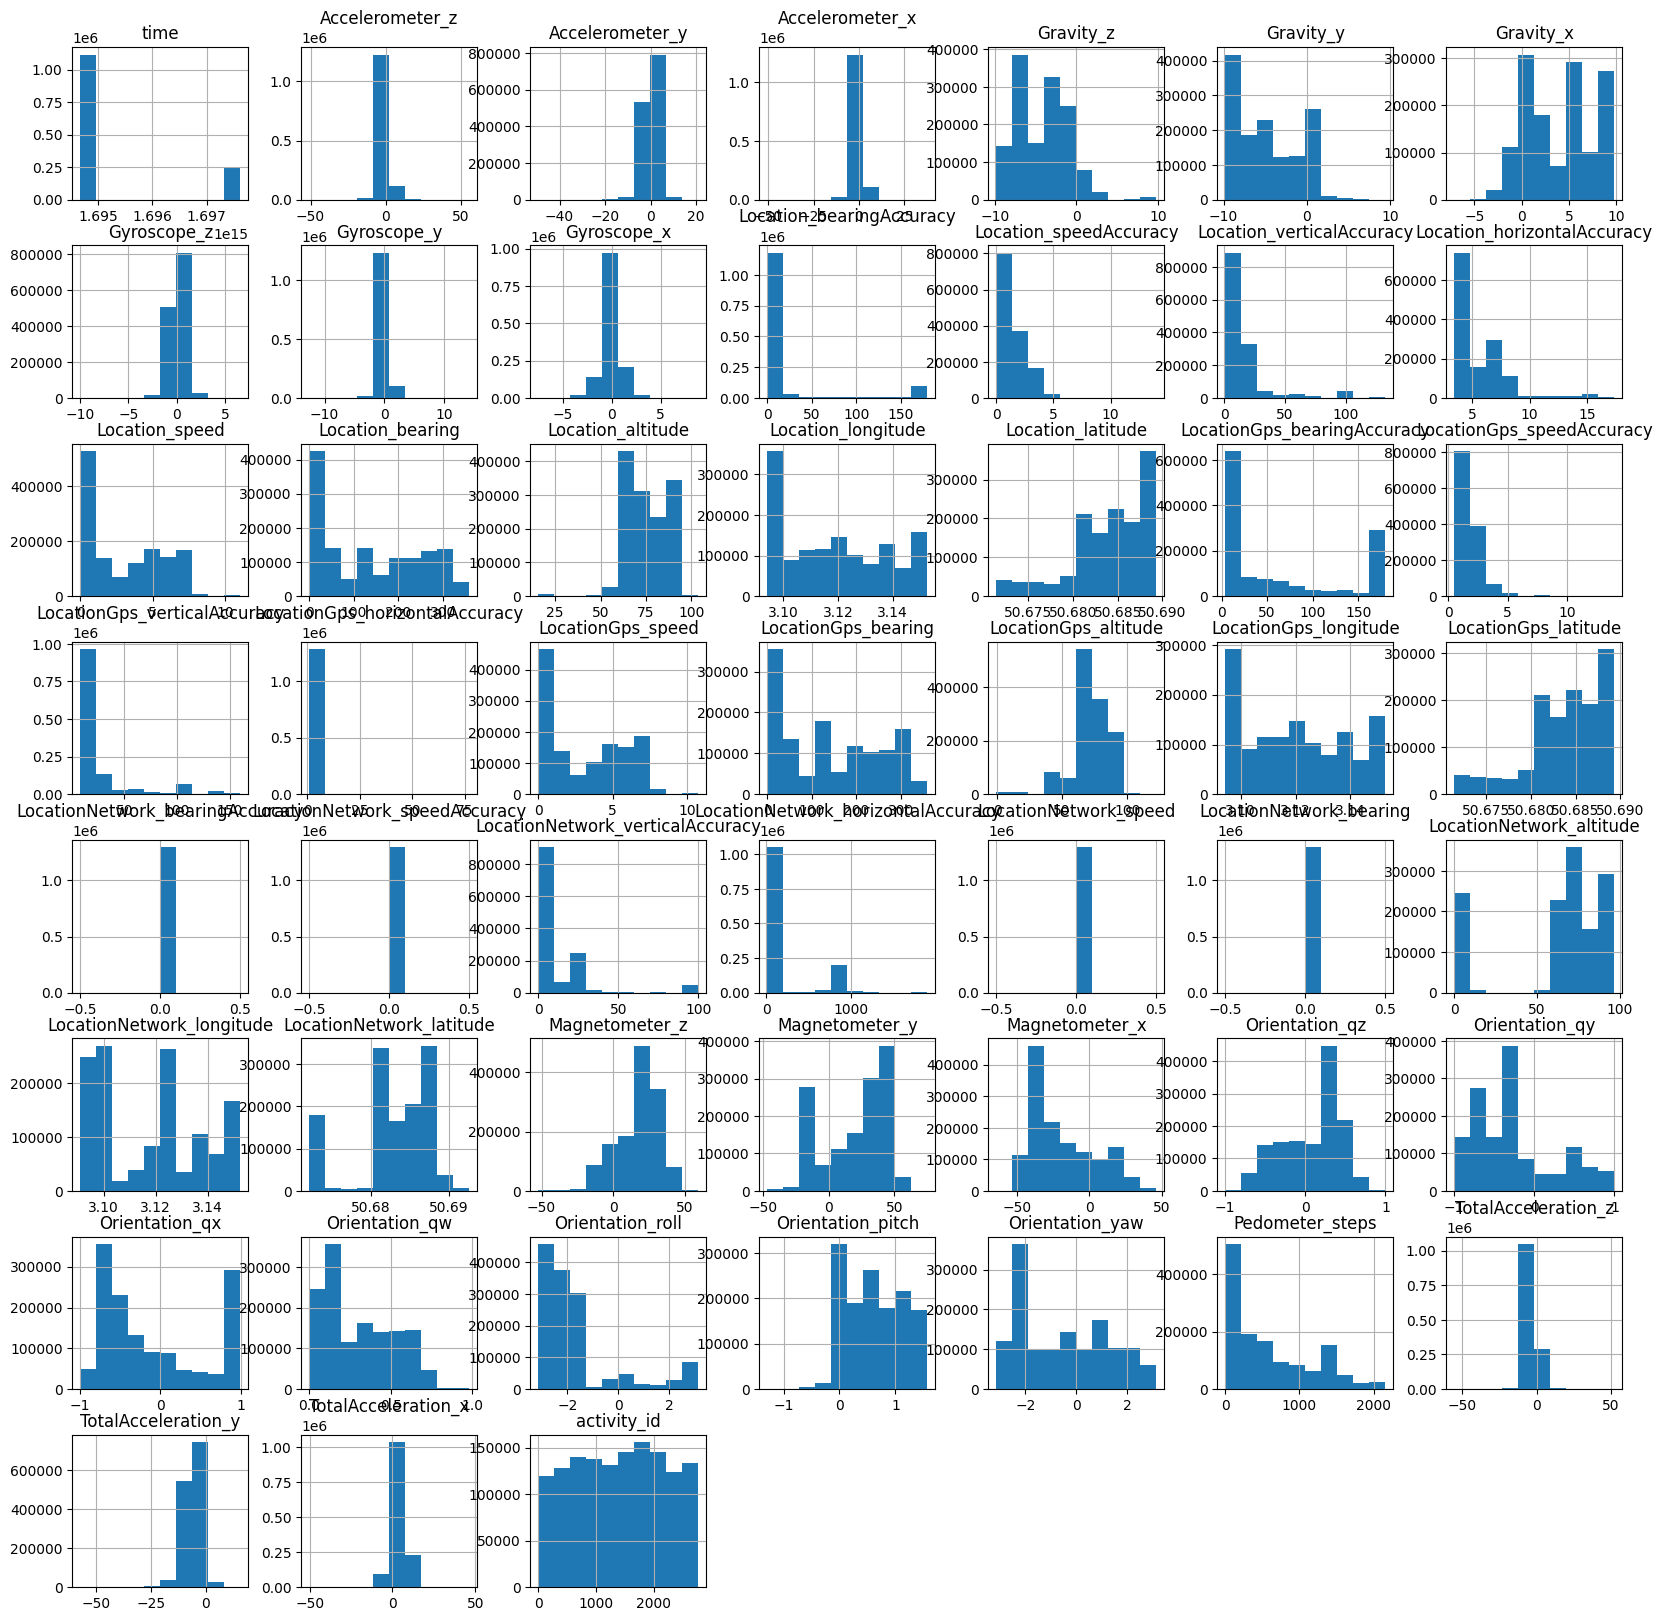

In [35]:
df.hist(figsize = (20, 20))

Columns LocationNetwork_bearingAccuracy, LocationNetwork_speedAccuracy, LocationNetwork_horizontalAccuracy, LocationNetwork_speed, LocationNetwork_bearing, Location_horizontalAccuracy, LocationGps_horizontalAccuracy to check.

In [36]:
if 'LocationNetwork_bearingAccuracy' in df.columns:
    print(df['LocationNetwork_bearingAccuracy'].describe())
    print()
if 'LocationNetwork_speedAccuracy' in df.columns:
    print(df['LocationNetwork_speedAccuracy'].describe())
    print()
if 'LocationNetwork_horizontalAccuracy' in df.columns:
    print(df['LocationNetwork_horizontalAccuracy'].describe())
    print()
if 'LocationNetwork_speed' in df.columns:
    print(df['LocationNetwork_speed'].describe())
    print()
if 'LocationNetwork_bearing' in df.columns:
    print(df['LocationNetwork_bearing'].describe())
    print()
if 'Location_horizontalAccuracy' in df.columns:
    print(df['Location_horizontalAccuracy'].describe())
    print()
if 'LocationGPS_horizontalAccuracy' in df.columns:
    print(df['LocationGPS_horizontalAccuracy'].describe())
    print()

count    1293886.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_bearingAccuracy, dtype: float64

count    1293886.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_speedAccuracy, dtype: float64

count    1.293886e+06
mean     2.058297e+02
std      3.095050e+02
min      1.150500e+01
25%      1.639900e+01
50%      5.346300e+01
75%      1.496000e+02
max      1.899999e+03
Name: LocationNetwork_horizontalAccuracy, dtype: float64

count    1293886.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_speed, dtype: float64

count    1293886.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name:

Almost all columns from above are 0 - delete them.

### Reduction of unnecessary features

In [37]:
def modify_data(df):
    # Calculate the magnitude of Gyroscope
    df['Gyroscope'] = np.sqrt(df['Gyroscope_x']**2 + df['Gyroscope_y']**2 + df['Gyroscope_z']**2)
    
    # Calculate the magnitude of Magnetometer
    df['Magnetometer'] = np.sqrt(df['Magnetometer_x']**2 + df['Magnetometer_y']**2 + df['Magnetometer_z']**2)
    
    # Calculate the magnitude of Total Acceleration
    df['TotalAcceleration'] = np.sqrt(df['TotalAcceleration_x']**2 + df['TotalAcceleration_y']**2 + df['TotalAcceleration_z']**2)
    
    # Select the required columns
    df = df[['time', 'Gyroscope', 'Location_speed', 'Orientation_roll', 'Orientation_pitch', 
             'Orientation_yaw', 'Pedometer_steps', 'Magnetometer', 'TotalAcceleration', 
             'Location_longitude', 'Location_latitude', 'Location_altitude', 'Location_bearing', 'activity_id']]
    
    return df

In [38]:
df = modify_data(df)
df

,time,Gyroscope,Location_speed,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,Magnetometer,TotalAcceleration,Location_longitude,Location_latitude,Location_altitude,Location_bearing,activity_id
0,1.694673e+15,1.985376,1.540603e+00,-1.475532,1.385582,-0.924110,10,49.676554,15.912341,3.138629,50.682404,85.400002,38.479248,1
1,1.694673e+15,1.860894,1.540603e+00,-1.482804,1.388674,-0.908072,10,49.676554,15.320798,3.138629,50.682404,85.400002,38.479248,1
2,1.694673e+15,1.811145,1.540603e+00,-1.493189,1.390990,-0.898299,10,49.676554,14.691146,3.138629,50.682404,85.400002,38.479248,1
3,1.694673e+15,1.830803,1.540603e+00,-1.509104,1.392257,-0.883821,10,49.676554,13.810445,3.138629,50.682404,85.400002,38.479248,1
4,1.694673e+15,1.887848,1.540603e+00,-1.535874,1.391369,-0.859356,10,49.676554,12.545262,3.138629,50.682404,85.400002,38.479248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359889,1.694889e+15,0.002532,4.953051e-34,-2.789188,-0.257240,2.794628,1489,47.248501,9.673904,3.152370,50.681517,89.599998,0.000000,2774
1359890,1.694889e+15,0.003120,4.953051e-34,-2.789329,-0.257238,2.794364,1489,47.248501,9.687798,3.152370,50.681517,89.599998,0.000000,2774
1359891,1.694889e+15,0.003120,4.953051e-34,-2.789350,-0.257228,2.794364,1489,47.248501,9.678384,3.152370,50.681517,89.599998,0.000000,2774
1359892,1.694889e+15,0.002532,4.953051e-34,-2.789321,-0.257217,2.794378,1489,47.248501,9.652449,3.152370,50.681517,89.599998,0.000000,2774


### Checking for null values

In [39]:
def check_null_values(df):
    print("Checking for null values in the dataset")
    for column in df.columns:
        print(column)
        print(df[column].isnull().sum())
    print()
    print()

In [40]:
check_null_values(df)

Checking for null values in the dataset
time
0
Gyroscope
0
Location_speed
0
Orientation_roll
0
Orientation_pitch
0
Orientation_yaw
0
Pedometer_steps
0
Magnetometer
0
TotalAcceleration
0
Location_longitude
0
Location_latitude
0
Location_altitude
0
Location_bearing
0
activity_id
0




In [41]:
df = df.dropna(subset=['Orientation_pitch'])

In [42]:
check_null_values(df)

Checking for null values in the dataset
time
0
Gyroscope
0
Location_speed
0
Orientation_roll
0
Orientation_pitch
0
Orientation_yaw
0
Pedometer_steps
0
Magnetometer
0
TotalAcceleration
0
Location_longitude
0
Location_latitude
0
Location_altitude
0
Location_bearing
0
activity_id
0




There are no missing values now.

### Histograms for every column

In [43]:
def plot_histograms(df):
    print("Histograms")

    num_columns = len(df.columns)
    num_rows = (num_columns + 2) // 3  

    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  

    for i, column in enumerate(df.columns):
        axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)
    
    # Ukrywanie pustych subplotów, jeśli istnieją
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    print()
    print()

Histograms


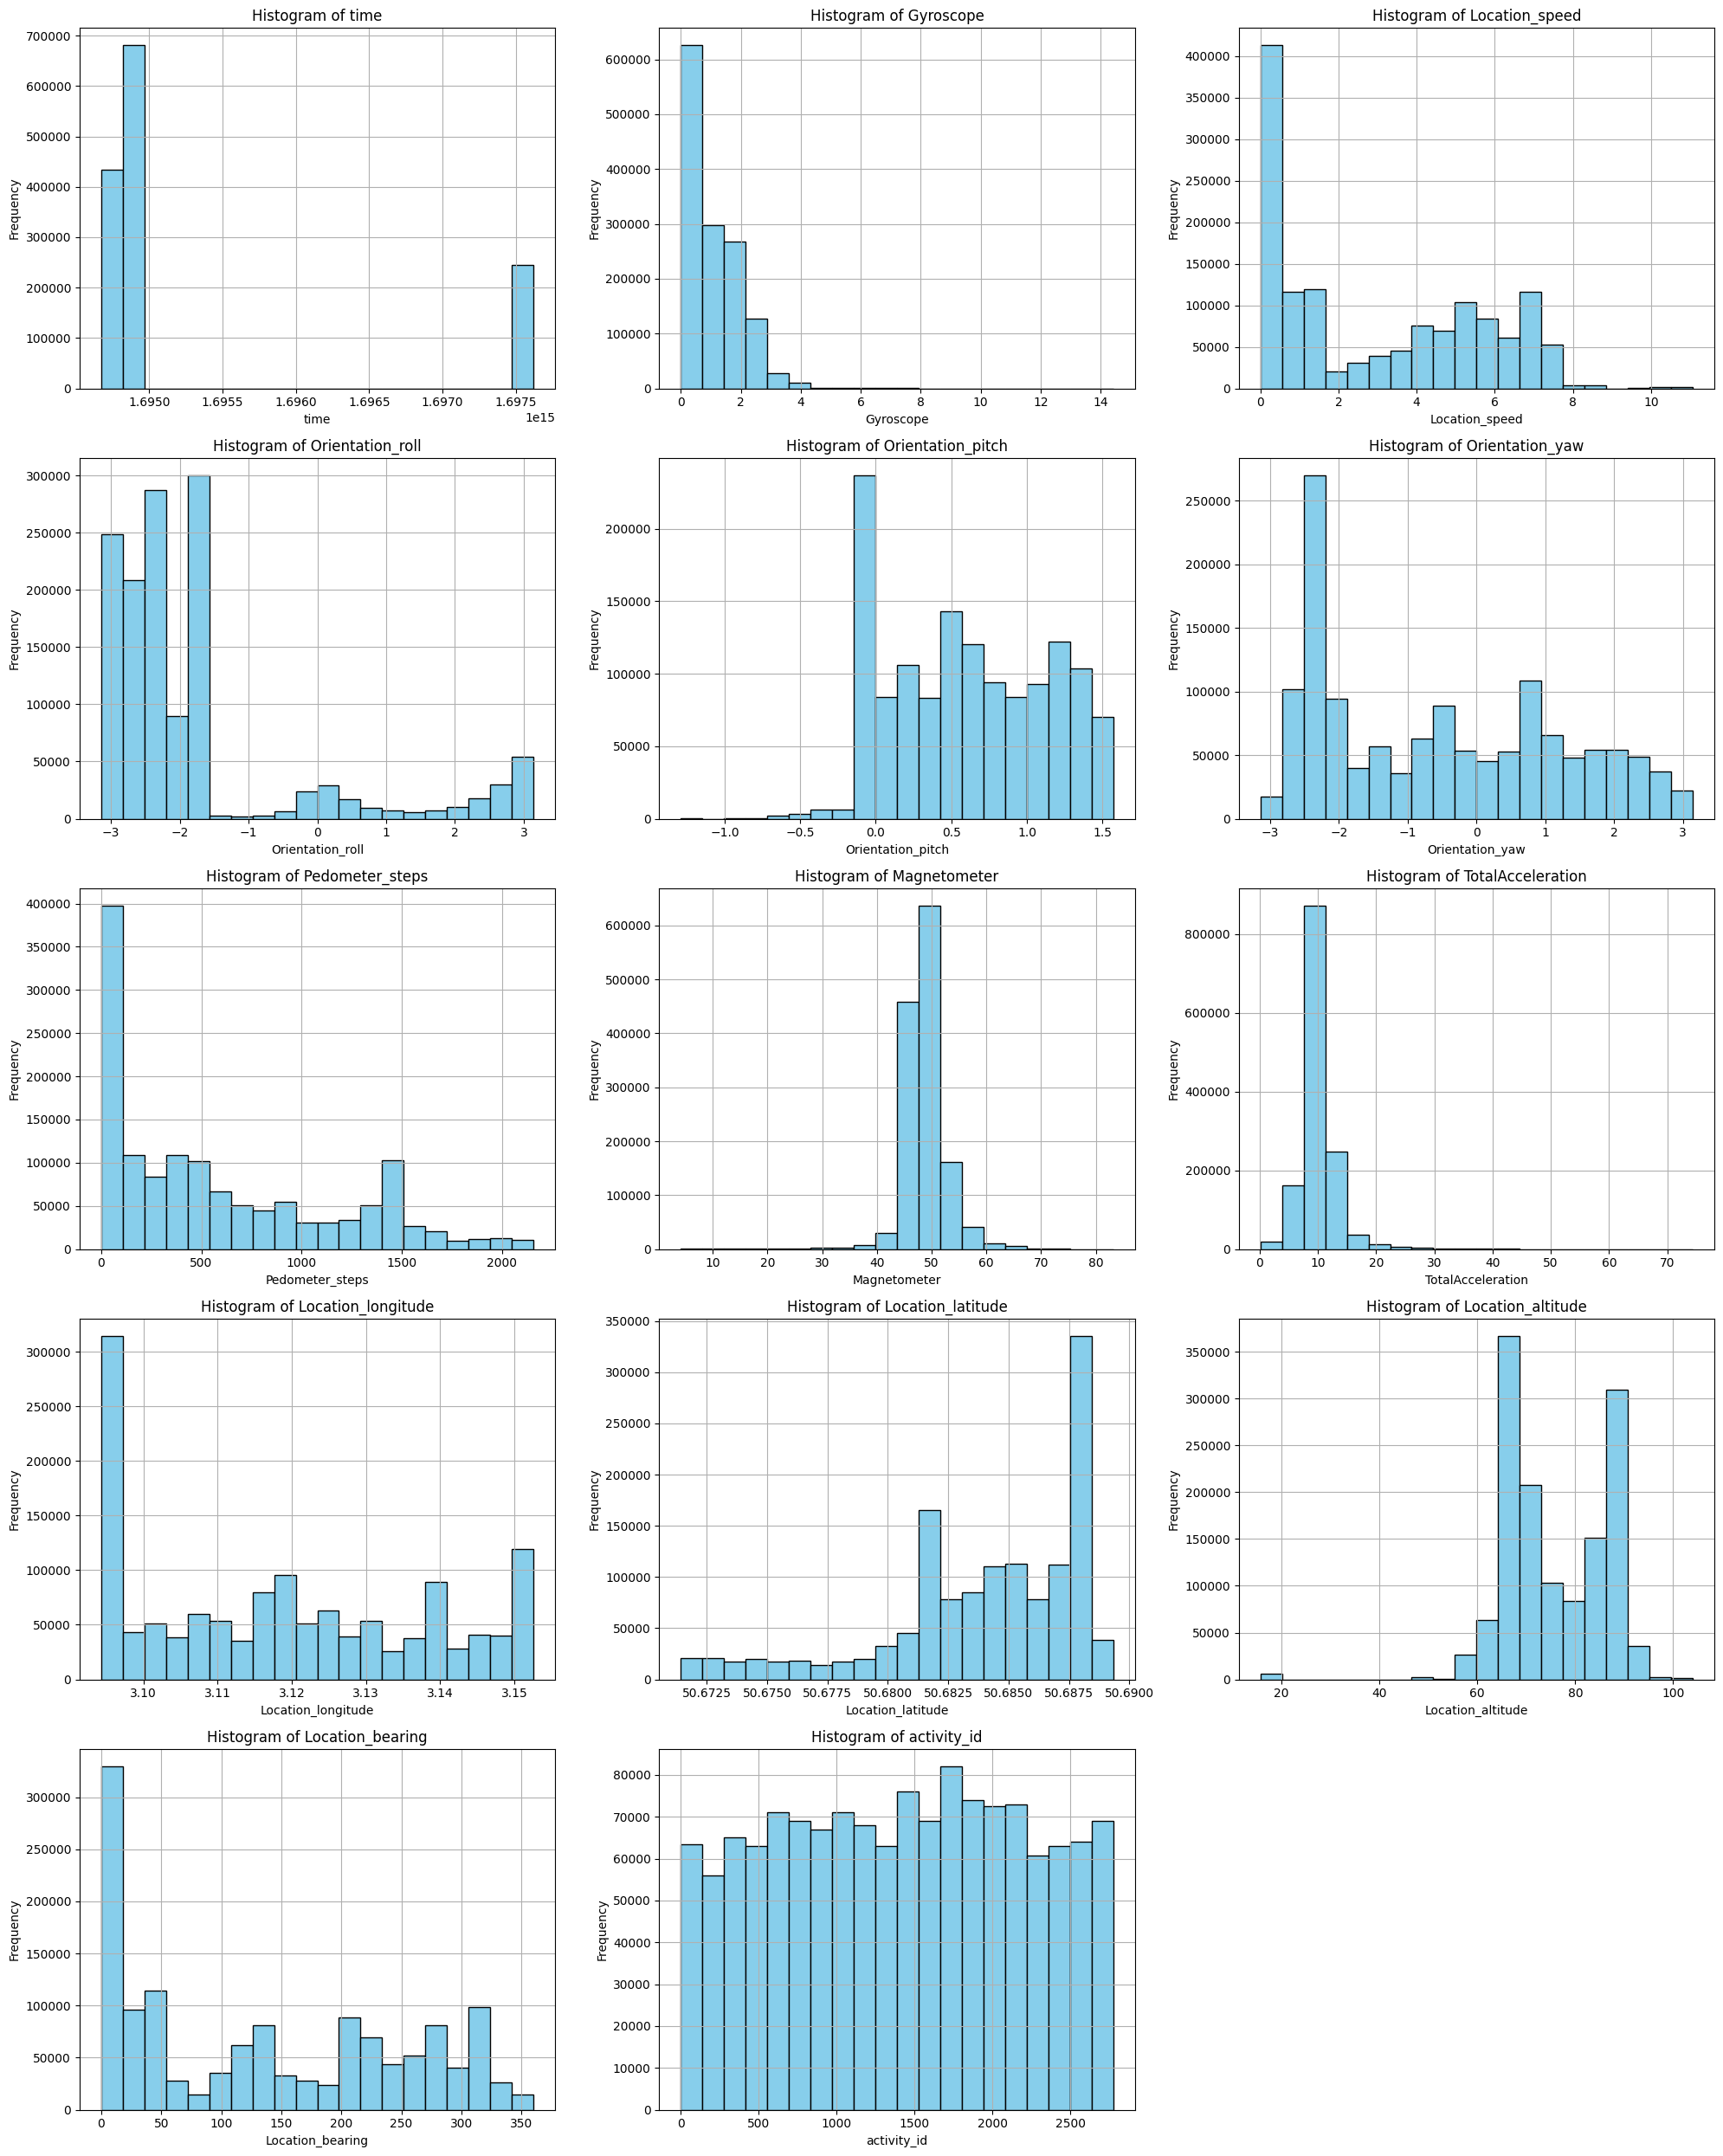

In [44]:
plot_histograms(df)

### Boxplots for every column

In [45]:
def plot_boxplots(df):
    num_columns = len(df.columns) - 1  
    num_rows = (num_columns + 2) // 3 
    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
    axes = axes.flatten() 

    for i, column in enumerate(df.columns):
        if column == 'id':
            continue
        axes[i].boxplot(df[column]) 
        axes[i].set_title(f'Boxplot of {column}')  
        axes[i].set_xlabel(column)  
        axes[i].set_ylabel('Values')  
        axes[i].grid(True)  
    
    # Ukrywanie pustych subplotów, jeśli istnieją
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

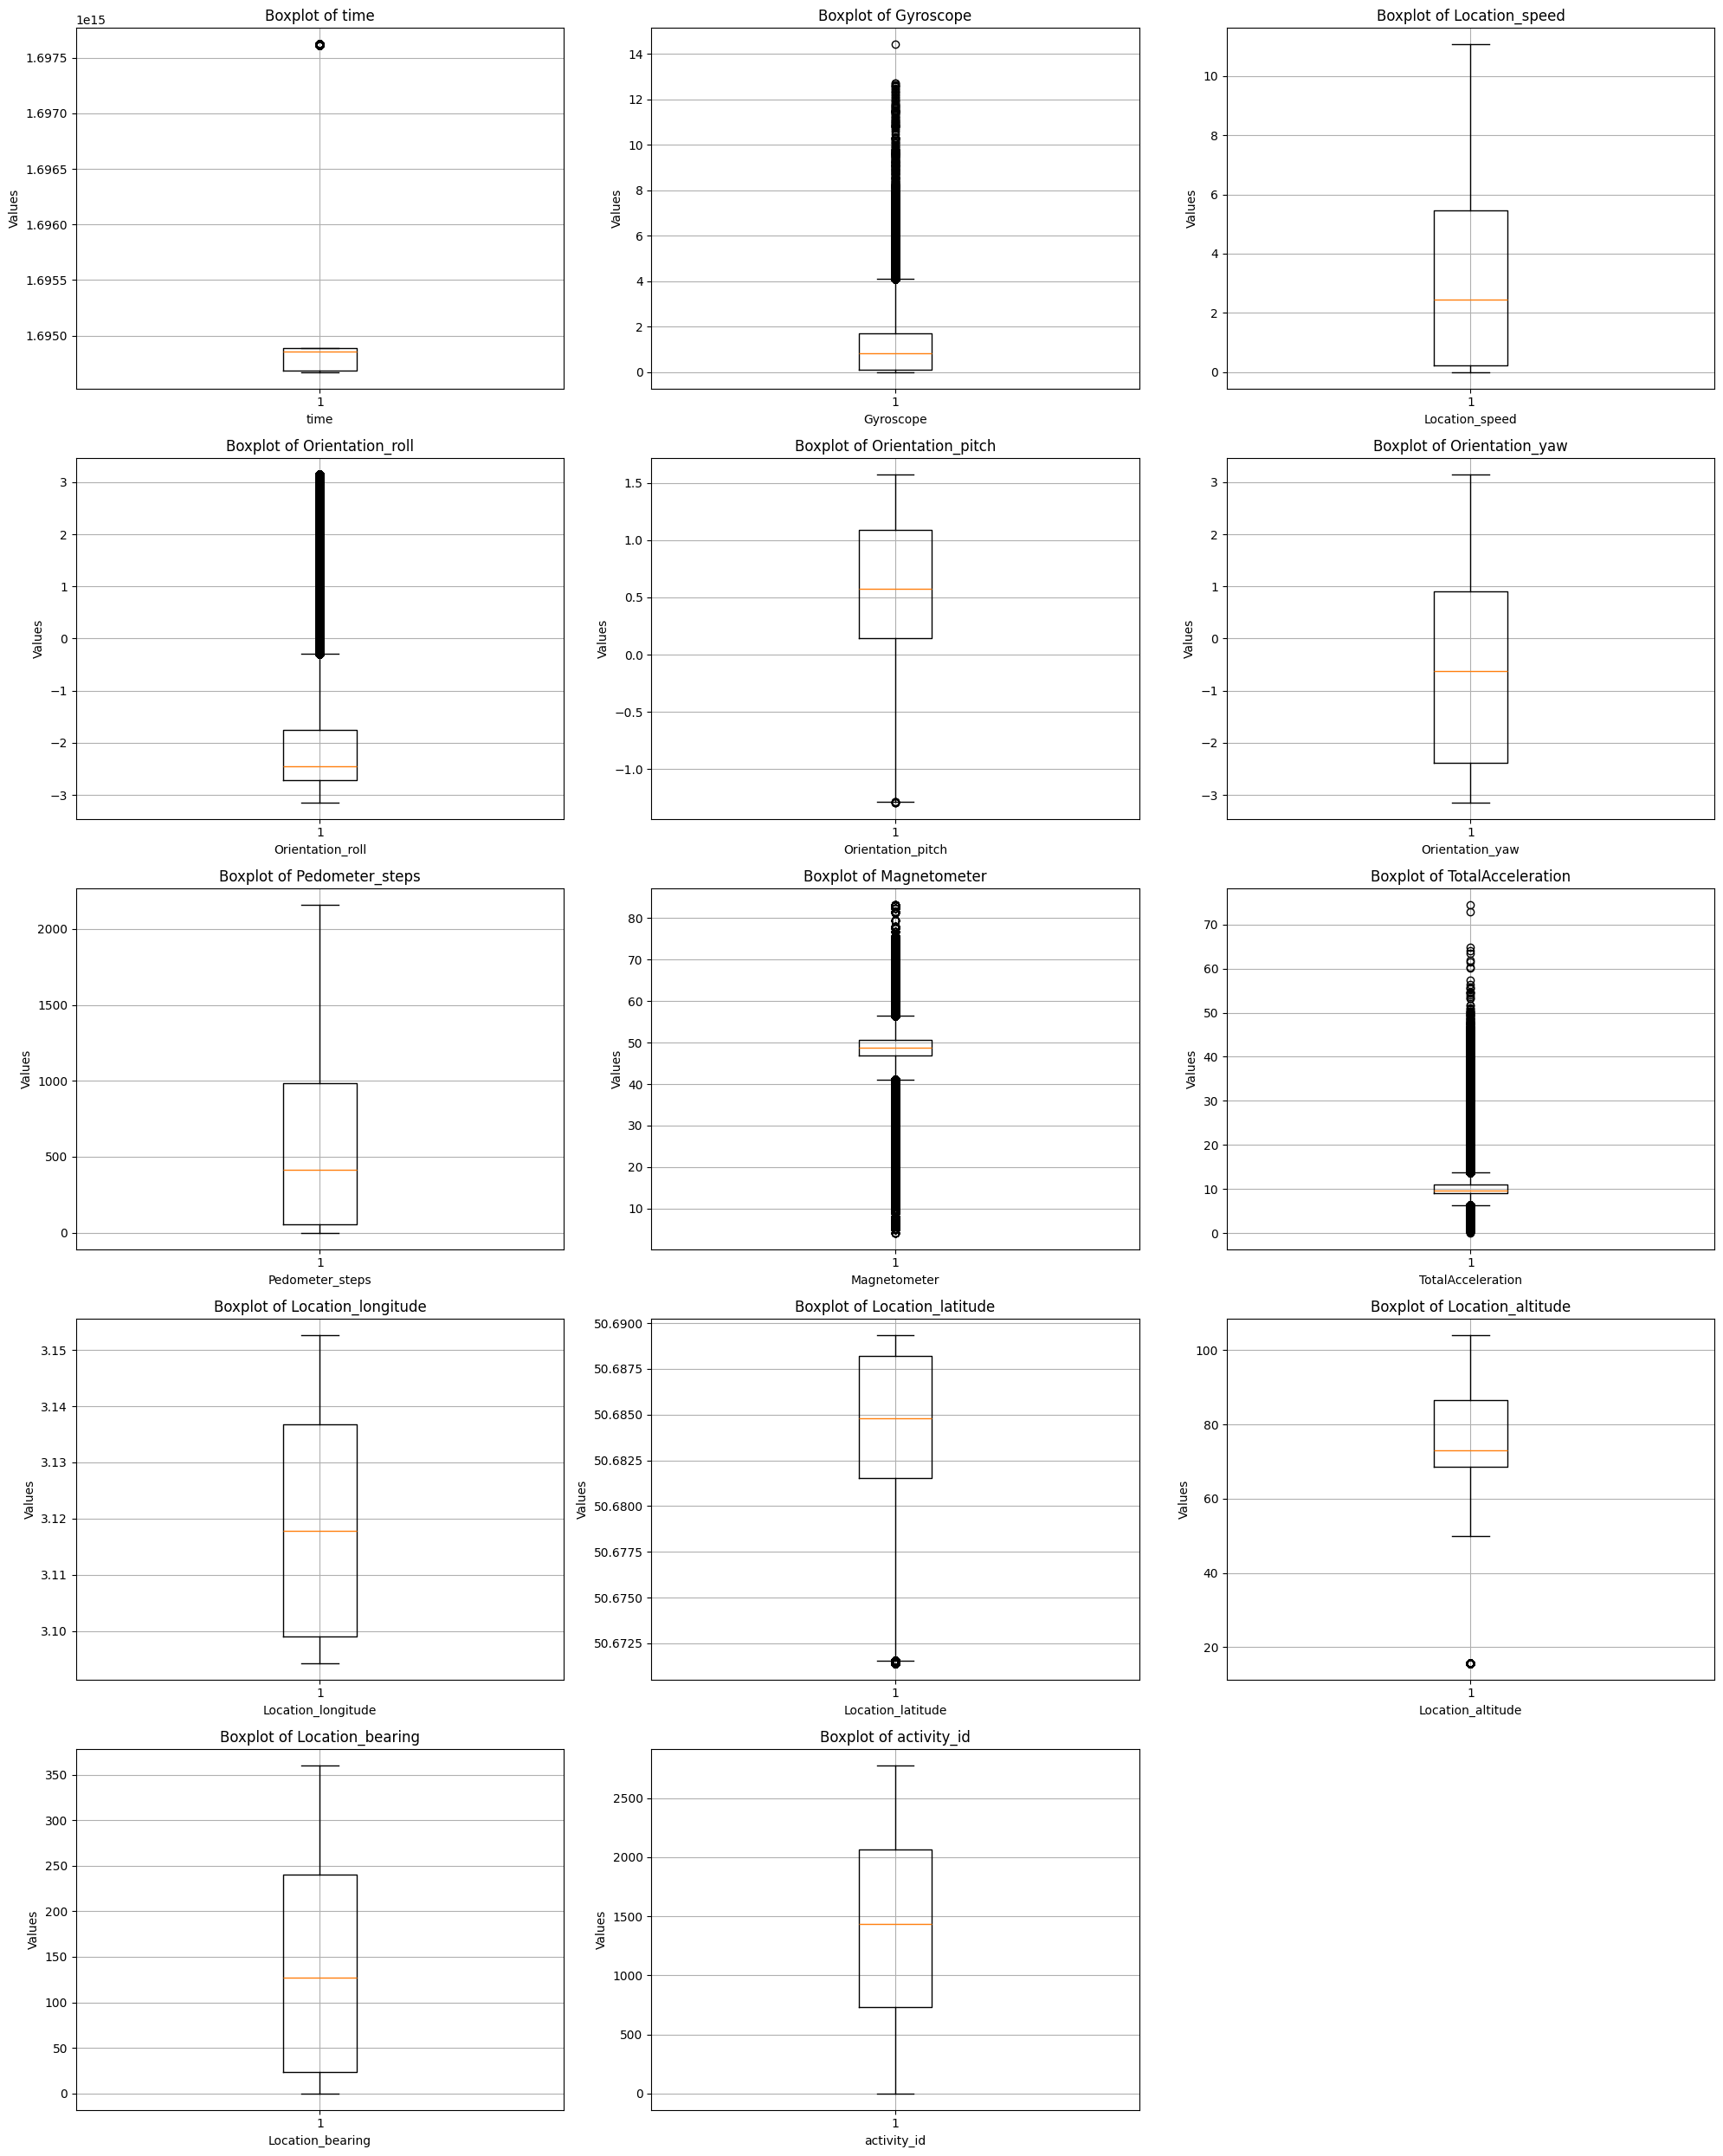

In [46]:
plot_boxplots(df)

### Replacing outliers in Location_speed

We think that we should replace outliers in Location_speed column.

In [47]:
def replace_outliers_with_quantile(df):
    speed_quantile = df['Location_speed'].quantile(0.95)
    
    df.loc[df['Location_speed'] > speed_quantile, 'Location_speed'] = speed_quantile
    
    return df

In [48]:
replace_outliers_with_quantile(df)

,time,Gyroscope,Location_speed,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,Magnetometer,TotalAcceleration,Location_longitude,Location_latitude,Location_altitude,Location_bearing,activity_id
0,1.694673e+15,1.985376,1.540603e+00,-1.475532,1.385582,-0.924110,10,49.676554,15.912341,3.138629,50.682404,85.400002,38.479248,1
1,1.694673e+15,1.860894,1.540603e+00,-1.482804,1.388674,-0.908072,10,49.676554,15.320798,3.138629,50.682404,85.400002,38.479248,1
2,1.694673e+15,1.811145,1.540603e+00,-1.493189,1.390990,-0.898299,10,49.676554,14.691146,3.138629,50.682404,85.400002,38.479248,1
3,1.694673e+15,1.830803,1.540603e+00,-1.509104,1.392257,-0.883821,10,49.676554,13.810445,3.138629,50.682404,85.400002,38.479248,1
4,1.694673e+15,1.887848,1.540603e+00,-1.535874,1.391369,-0.859356,10,49.676554,12.545262,3.138629,50.682404,85.400002,38.479248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359889,1.694889e+15,0.002532,4.953051e-34,-2.789188,-0.257240,2.794628,1489,47.248501,9.673904,3.152370,50.681517,89.599998,0.000000,2774
1359890,1.694889e+15,0.003120,4.953051e-34,-2.789329,-0.257238,2.794364,1489,47.248501,9.687798,3.152370,50.681517,89.599998,0.000000,2774
1359891,1.694889e+15,0.003120,4.953051e-34,-2.789350,-0.257228,2.794364,1489,47.248501,9.678384,3.152370,50.681517,89.599998,0.000000,2774
1359892,1.694889e+15,0.002532,4.953051e-34,-2.789321,-0.257217,2.794378,1489,47.248501,9.652449,3.152370,50.681517,89.599998,0.000000,2774


## **Feature engineering**

We will stary by defining function to calculate total distance.

In [49]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface specified in decimal degrees using the Haversine formula.
    """
    # Przeliczanie na radiany
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Różnica między szerokościami i długościami geograficznymi
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Obliczanie odległości za pomocą formuły haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    R = 6371 # Średnica Ziemi w kilometrach
    distance = R * c
    
    return distance # Odległość w kilometrach

### Function to summarise activity

A function that aggregates available data about one activity.

In [66]:
def summarise_activity(df):
    def summarise_group(group):
        total_distance = 0
        for i in range(len(group) - 1):
            distance = haversine_distance(
                group['Location_latitude'].iloc[i], group['Location_longitude'].iloc[i],
                group['Location_latitude'].iloc[i + 1], group['Location_longitude'].iloc[i + 1]
            )
            total_distance += distance
            
        total_steps = group['Pedometer_steps'].max() - group['Pedometer_steps'].min()  # Użycie maksymalnej liczby kroków
        time_duration_seconds = (group['time'].max() - group['time'].min()) / 10**6  # Czas trwania w sekundach
        time_duration_minutes = time_duration_seconds / 60  # Czas trwania w minutach

        if time_duration_minutes == 0:
            steps_per_minute = 0
        else:
            steps_per_minute = total_steps / time_duration_minutes  # Kroki na minutę
        
        return pd.Series({
            'id': group['activity_id'].iloc[0],  # Unique id
            'total_time': (group['time'].max() - group['time'].min()) / 10 ** 6,  # Duration in seconds
            
            'mean_speed': group['Location_speed'].mean() * 3.6,  # Average speed in km/h
            'max_speed': group['Location_speed'].max() * 3.6,  # Maximum speed in km/h
            'min_speed': group['Location_speed'].min() * 3.6,  # Minimum speed in km/h
            
            'total_distance': total_distance,  # Total distance
            
            'mean_acceleration': group['TotalAcceleration'].mean(),  # Average acceleration
            'max_acceleration': group['TotalAcceleration'].max(),  # Maximum acceleration
            'min_acceleration': group['TotalAcceleration'].min(),  # Minimum acceleration
            'sd_acceleration': group['TotalAcceleration'].std(),  # Standard deviation of acceleration
            
            'mean_gyroscope': group['Gyroscope'].mean(),  # Average gyroscope
            'mean_magnetometer': group['Magnetometer'].mean(),  # Average magnetometer
            
            'steps_per_minute': steps_per_minute,  # Steps per minute
            'total_steps': group['Pedometer_steps'].max(),  # Total steps
            
            'average_roll': group['Orientation_roll'].mean(),  # Average roll
            'median_roll': group['Orientation_roll'].median(),  # Median roll
            'min_roll': group['Orientation_roll'].min(),  # Minimum roll
            'max_roll': group['Orientation_roll'].max(),  # Maximum roll
            'sd_roll': group['Orientation_roll'].std(),  # Standard deviation of roll
            
            'average_pitch': group['Orientation_pitch'].mean(),  # Average pitch
            'median_pitch': group['Orientation_pitch'].median(),  # Median pitch
            'min_pitch': group['Orientation_pitch'].min(),  # Minimum pitch
            'max_pitch': group['Orientation_pitch'].max(),  # Maximum pitch
            'sd_pitch': group['Orientation_pitch'].std(),  # Standard deviation of pitch
            
            'average_yaw': group['Orientation_yaw'].mean(),  # Average yaw
            'median_yaw': group['Orientation_yaw'].median(),  # Median yaw
            'min_yaw': group['Orientation_yaw'].min(),  # Minimum yaw
            'max_yaw': group['Orientation_yaw'].max(),  # Maximum yaw
            'sd_yaw': group['Orientation_yaw'].std()  # Standard deviation of yaw
        })

    grouped = df.groupby('activity_id')
    summary_df = grouped.apply(summarise_group).reset_index(drop=True)
    
    return summary_df

In [67]:
df['Pedometer_steps'].max()

2158

In [68]:
result = summarise_activity(df)

In [69]:
result[['steps_per_minute', 'total_steps', 'total_time']]


,steps_per_minute,total_steps,total_time
0,0.000000,10.0,2.516568
1,47.683648,14.0,2.516586
2,95.368773,18.0,2.516547
3,119.212340,23.0,2.516518
4,143.058049,51.0,2.516461
...,...,...,...
1357,0.000000,1489.0,2.516988
1358,0.000000,1489.0,2.516955
1359,0.000000,1489.0,2.516937
1360,0.000000,1489.0,2.516907


In [70]:
result

,id,total_time,mean_speed,max_speed,min_speed,total_distance,mean_acceleration,max_acceleration,min_acceleration,sd_acceleration,...,average_pitch,median_pitch,min_pitch,max_pitch,sd_pitch,average_yaw,median_yaw,min_yaw,max_yaw,sd_yaw
0,1.0,2.516568,5.173939e+00,5.899335e+00,4.268667e+00,0.004106,11.128816,30.661771,2.006561,3.732603,...,1.146609,1.183848,0.704922,1.392257,0.161337,0.348759,0.502064,-0.924110,0.842999,0.340052
1,5.0,2.516586,1.968896e+01,2.065492e+01,1.858205e+01,0.015013,9.435222,15.380802,4.104719,2.535196,...,0.852818,0.852653,0.550267,1.161363,0.202255,0.897616,0.880279,0.749725,1.063218,0.090310
2,6.0,2.516547,2.345041e+01,2.522632e+01,2.065492e+01,0.020659,10.165091,27.075988,1.991092,3.804351,...,0.905452,0.955169,0.549870,1.218063,0.200869,0.904471,0.865037,0.692381,1.169990,0.113996
3,7.0,2.516518,2.408345e+01,2.522632e+01,2.356563e+01,0.013338,9.919805,33.370849,2.437895,4.656513,...,0.983790,1.084632,0.555272,1.180261,0.206061,0.926043,0.940593,0.722495,1.136638,0.098998
4,14.0,2.516461,2.297993e+01,2.342595e+01,2.240767e+01,0.012986,10.009292,16.045337,3.249020,2.660994,...,0.897514,0.946604,0.549128,1.181504,0.191034,1.637915,1.602331,1.429247,1.965050,0.127067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,2767.0,2.516988,1.916608e-13,1.068546e-12,1.892420e-15,0.000000,9.724790,10.931152,8.544435,0.344378,...,-0.252828,-0.252271,-0.312316,-0.214265,0.016260,2.563014,2.569063,2.492903,2.593837,0.024210
1358,2768.0,2.516955,5.899156e-15,9.447700e-15,1.475637e-15,0.000000,9.764930,14.860114,5.357236,1.541327,...,-0.297934,-0.297396,-0.451035,-0.101935,0.077926,2.678181,2.693146,2.549126,2.820935,0.081109
1359,2769.0,2.516937,8.936665e-17,1.986083e-16,3.140592e-18,0.000000,9.709780,10.299425,9.056156,0.202371,...,-0.259117,-0.254087,-0.316031,-0.223866,0.019674,2.774414,2.778325,2.725161,2.807665,0.022880
1360,2773.0,2.516907,5.407616e-28,1.093860e-27,5.110263e-30,0.000000,9.703497,9.920220,9.501199,0.076711,...,-0.275386,-0.275647,-0.295679,-0.249763,0.009789,2.754753,2.752955,2.717815,2.791834,0.027663


## **Saving to csv file**

In [71]:
result.to_csv("..//final_data//result_data.csv", index=False)

We have almost ready DataFrame for clustering. It still needs one EDA and one feature engineering, but we'll do that in the next file.